In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#index_col='year_built',
df = pd.read_csv('data/properties.csv',  dtype={'census_tract': object} )

Split the coordinates column into lat long columns with some regex. Drop NaN cells and convert dtype to float64

In [2]:
df['lat'] = df['coordinates'].str.extract('(?<=\s)(\d+.\d+)', expand=True).dropna().astype(np.float64)
df['lon'] = df['coordinates'].str.extract('(\-\w+.\d*)', expand=True).dropna().astype(np.float64)

`dropna` does not seem to do so - I think I need to do that on each row rather than cell. Counting the number of NaN values in the `lon` column using `np.count_nonzero(np.isnan(df['lon']))` I can see there are 1305 missing values, small fry when set against the 580042 total values.

## Plotting a map.

In [3]:
p_lng = df.lon
p_lat = df.lat

In [ ]:
p_lng

In [4]:
def lat_lng_to_pixels(lat, lng):
    lat_rad = lat * np.pi / 180.0
    lat_rad = np.log(np.tan((lat_rad + np.pi / 2.0) / 2.0))
    x = 100 * (lng + 180.0) / 360.0
    y = 100 * (lat_rad - np.pi) / (2.0 * np.pi)
    return (x, y)

px, py = lat_lng_to_pixels(p_lat, p_lng)

In [5]:
pd.options.display.mpl_style = 'default' #Better Styling  
from matplotlib import rcParams  
rcParams['figure.figsize'] = (17.5, 17) #Size of figure  
rcParams['figure.dpi'] = 250

/Users/will/anaconda3/envs/odp/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2881: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


(29.079999999999998,
 29.199999999999999,
 -37.920000000000002,
 -37.799999999999997)

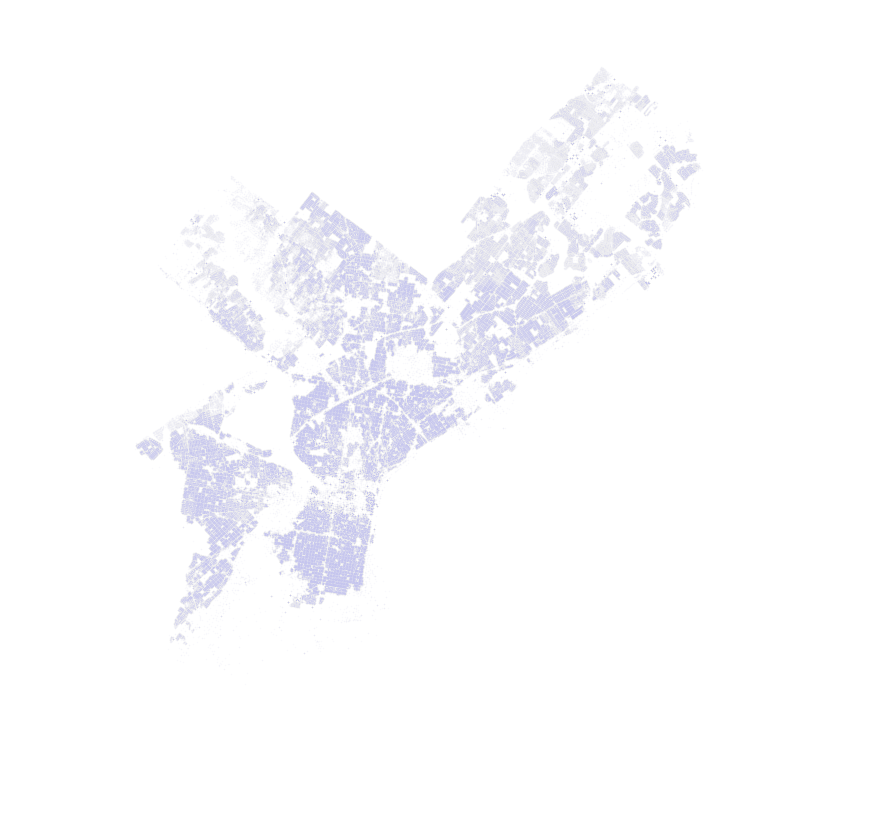

In [7]:
plt.figure(figsize=(10, 10))
plt.scatter(px, py, s=.1, alpha=.1)
plt.axis('equal')
plt.xlim(29.08, 29.20)
plt.ylim(-37.92, -37.80)
plt.axis('off')